In [7]:
import os
import datascout
import pyarrow.parquet as pq

folder_path = "H_angle"

# List all files in the folder
file_list = os.listdir(folder_path)

# Filter only Parquet files
parquet_files = [file for file in file_list if file.endswith(".parquet")]

# List to store results
result_list = []

# Apply datascout.parquet_to_dict() function to each Parquet file
for parquet_file in parquet_files:
    # Construct the full path to the Parquet file
    file_path = os.path.join(folder_path, parquet_file)

    # Print the current file being processed
    print(f"Processing file: {file_path}")

    # Convert the table to a dictionary using datascout
    data_dict = datascout.parquet_to_dict(file_path)
    
    # Append the result to the list
    result_list.append({"filename": parquet_file, "data": data_dict})



Processing file: H_angle/angle11.842105263157894.parquet
Processing file: H_angle/angle8.684210526315791.parquet
Processing file: H_angle/angle-0.7894736842105257.parquet
Processing file: H_angle/angle-2.3684210526315788.parquet
Processing file: H_angle/angle15.0.parquet
Processing file: H_angle/angle5.526315789473685.parquet
Processing file: H_angle/angle-8.68421052631579.parquet
Processing file: H_angle/angle-10.263157894736842.parquet
Processing file: H_angle/angle-11.842105263157894.parquet
Processing file: H_angle/angle-7.105263157894736.parquet
Processing file: H_angle/angle-5.526315789473685.parquet
Processing file: H_angle/angle-15.0.parquet
Processing file: H_angle/angle0.7894736842105274.parquet
Processing file: H_angle/angle7.105263157894736.parquet
Processing file: H_angle/angle-13.421052631578947.parquet
Processing file: H_angle/angle-3.947368421052632.parquet
Processing file: H_angle/angle3.94736842105263.parquet
Processing file: H_angle/angle10.263157894736842.parquet
Pr

In [21]:
import re
anlge_list=[]
sigma_v_list = []
sigma_h_list =[]

result_list

for result in result_list:

    filename=result['filename']

    numeric_value = float(filename.split("angle")[1].split(".parquet")[0])


    # Convert the numeric part to a float
    numeric_value = float(numeric_value)

    anlge_list.append(numeric_value)

    # a['data_dict']['LNA.BPM/OrbitAcquisition']['value'].keys()

    #a['data_dict']['LNE06.BSGW.0657/Acquisition']['value']['sigma'] #doesnt work


    # result['data']['LNE00.BSGW.0008/Acquisition']['value']['sigma']

    sigma_v=result['data']['LNE00.BSGW.0008/Acquisition']['value']['sigma'][0]
    sigma_h=result['data']['LNE00.BSGW.0008/Acquisition']['value']['sigma'][1]

    sigma_v_list.append(sigma_v)
    sigma_h_list.append(sigma_h)

In [22]:
anlge_list

[11.842105263157894,
 8.684210526315791,
 -0.7894736842105257,
 -2.3684210526315788,
 15.0,
 5.526315789473685,
 -8.68421052631579,
 -10.263157894736842,
 -11.842105263157894,
 -7.105263157894736,
 -5.526315789473685,
 -15.0,
 0.7894736842105274,
 7.105263157894736,
 -13.421052631578947,
 -3.947368421052632,
 3.94736842105263,
 10.263157894736842,
 2.3684210526315788,
 13.421052631578949]

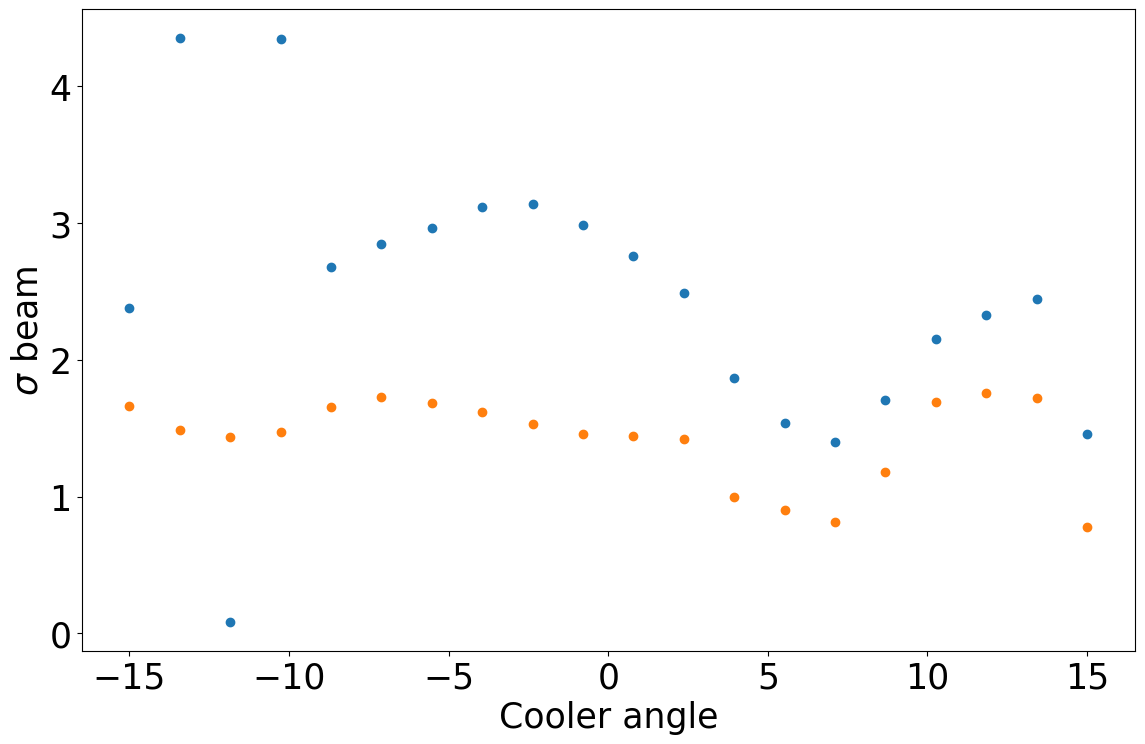

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(anlge_list,sigma_v_list,label='vertical') 
plt.scatter(anlge_list,sigma_h_list,label='horizontal') 
plt.xlabel('Cooler angle')
plt.ylabel('$\sigma$ beam')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('H_angle_experiment.png', format='png', dpi=300)
plt.show()
